In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("fgsea")

Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'fgsea'



The downloaded binary packages are in
	/var/folders/sk/3l94pbjd1xdcdppx2x6tyq700000gn/T//RtmpUU7NDb/downloaded_packages


Update old packages: 'BiocManager', 'data.table', 'hdf5r', 'htmltools',
  'htmlwidgets', 'maptools', 'pkgbuild', 'promises', 'RcppArmadillo', 'units'


In [3]:
library(fgsea)
library(ggplot2)
library(BiocParallel)
register(SerialParam())
require(tidyverse)

In [4]:
data(examplePathways)
data(exampleRanks)

In [11]:
str(examplePathways)%>%head(1)


List of 1457
 $ 1221633_Meiotic_Synapsis                                                                                                           : chr [1:64] "12189" "13006" "15077" "15078" ...
 $ 1368092_Rora_activates_gene_expression                                                                                             : chr [1:9] "11865" "12753" "12894" "18143" ...
 $ 1368110_Bmal1:Clock,Npas2_activates_circadian_gene_expression                                                                      : chr [1:16] "11865" "11998" "12753" "12952" ...
 $ 1445146_Translocation_of_Glut4_to_the_Plasma_Membrane                                                                              : chr [1:55] "11461" "11465" "11651" "11652" ...
 $ 186574_Endocrine-committed_Ngn3+_progenitor_cells                                                                                  : chr [1:4] "18012" "18088" "18506" "53626"
 $ 186589_Late_stage_branching_morphogenesis_pancreatic_bud_precursor_cells   

NULL

In [12]:
str(exampleRanks)

 Named num [1:12000] -63.3 -49.7 -43.6 -41.5 -33.3 ...
 - attr(*, "names")= chr [1:12000] "170942" "109711" "18124" "12775" ...


In [13]:
fgseaRes <- fgsea(pathways = examplePathways, 
                  stats = exampleRanks,
                  minSize=15,
                  maxSize=500,
                  nperm=10000)

In [15]:
fgseaRes%>%arrange(pval)%>%head(1)


pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
5990980_Cell_Cycle,0.0001229256,0.002300728,0.5388497,2.67656,0,369,"66336 , 66977 , 12442 , 107995, 66442 , 19361 , 12571 , 52276 , 54392 , 66311 , 215387, 67629 , 12649 , 72415 , 56150 , 57441 , 20877 , 67121 , 12615 , 21973 , 11799 , 66468 , 20135 , 67849 , 73804 , 70454 , 76044 , 20878 , 15270 , 13555 , 60411 , 12580 , 17219 , 69270 , 12575 , 69263 , 12448 , 14211 , 20873 , 18005 , 71988 , 12189 , 17215 , 12534 , 208628, 22390 , 68240 , 228421, 71846 , 68014 , 269582, 19348 , 12236 , 72151 , 18817 , 21781 , 18968 , 217653, 66934 , 272551, 227613, 67141 , 68612 , 68298 , 13361 , 108000, 23834 , 106344, 56452 , 242705, 18141 , 223921, 26886 , 13557 , 268697, 72155 , 56371 , 12531 , 327762, 12567 , 229841, 67052 , 16319 , 66634 , 67203 , 17865 , 12235 , 19891 , 74470 , 381318, 66570 , 17216 , 19687 , 17218 , 102920, 18973 , 16881 , 17463 , 75786 , 19645 , 19075 , 69736 , 19357 , 76816 , 70385 , 70645 , 22628 , 22627 , 52683 , 19076 , 18972 , 12544 , 17997 , 26440 , 68549 , 19088 , 269113, 26444 , 19324 , 103733, 19179 , 12579 , 232987, 17420 , 228769, 26445 , 105988, 69745 , 18538 , 69928 , 57296 , 14235 , 22171 , 19170 , 17246 , 17220 , 12144 , 50793 , 18392 , 236930, 67151 , 70024 , 59126 , 66296 , 16906 , 109145, 71819 , 67733 , 50883 , 12447 , 12532 , 14156 , 26442 , 19177 , 245688"


In [16]:
sum(fgseaRes[, padj < 0.01])

[1] 74

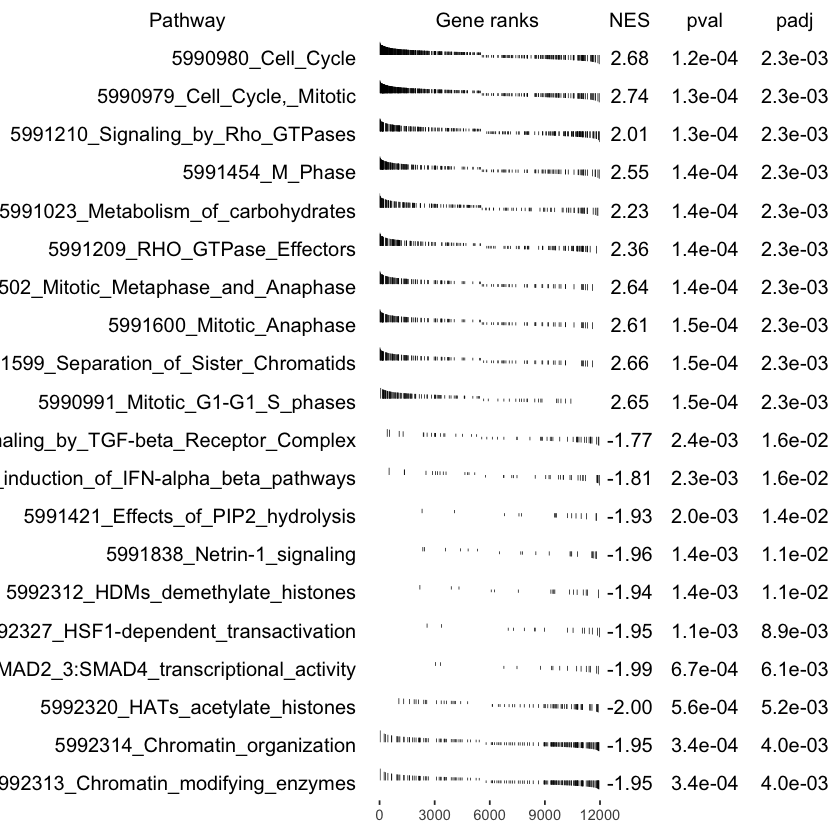

In [17]:
topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=10), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=10), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
plotGseaTable(examplePathways[topPathways], exampleRanks, fgseaRes, 
              gseaParam = 0.5)


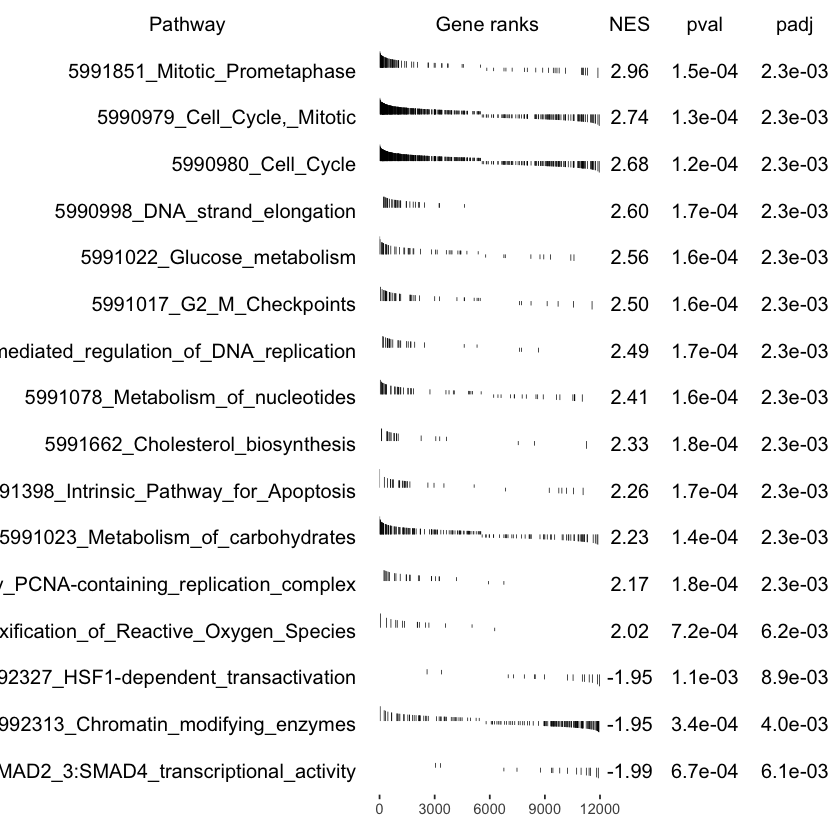

In [18]:
collapsedPathways <- collapsePathways(fgseaRes[order(pval)][padj < 0.01], 
                                      examplePathways, exampleRanks)
mainPathways <- fgseaRes[pathway %in% collapsedPathways$mainPathways][
                         order(-NES), pathway]
plotGseaTable(examplePathways[mainPathways], exampleRanks, fgseaRes, 
              gseaParam = 0.5)

### starting from files

In [19]:
rnk.file <- system.file("extdata", "naive.vs.th1.rnk", package="fgsea")
gmt.file <- system.file("extdata", "mouse.reactome.gmt", package="fgsea")

In [20]:
gmt.file

[1] "/Library/Frameworks/R.framework/Versions/3.5/Resources/library/fgsea/extdata/mouse.reactome.gmt"

In [27]:
system(paste('head -n1 ',gmt.file),intern = T)
system(paste('head -n2 ',rnk.file),intern = T)

[1] "1221633_Meiotic_Synapsis\t1221633\t12189\t13006\t15077\t15078\t15270\t15512\t16905\t16906\t19357\t20842\t20843\t20957\t20962\t21749\t21750\t22196\t23856\t24061\t28113\t50878\t56739\t57321\t64009\t66654\t69386\t71846\t74075\t77053\t94244\t97114\t97122\t97908\t101185\t140557\t223697\t260423\t319148\t319149\t319150\t319151\t319152\t319153\t319154\t319155\t319156\t319157\t319158\t319159\t319160\t319161\t319565\t320332\t320558\t326619\t326620\t360198\t497652\t544973\t625328\t667250\t100041230\t102641229\t102641751\t102642045"

[1] "ID\tt"                     "170942\t-63.3370337079998"

In [28]:
ranks <- read.table(rnk.file,
                    header=TRUE, colClasses = c("character", "numeric"))
ranks <- setNames(ranks$t, ranks$ID)
str(ranks)

 Named num [1:12000] -63.3 -49.7 -43.6 -41.5 -33.3 ...
 - attr(*, "names")= chr [1:12000] "170942" "109711" "18124" "12775" ...


In [24]:
pathways <- gmtPathways(gmt.file)
str(head(pathways))

List of 6
 $ 1221633_Meiotic_Synapsis                                                : chr [1:64] "12189" "13006" "15077" "15078" ...
 $ 1368092_Rora_activates_gene_expression                                  : chr [1:9] "11865" "12753" "12894" "18143" ...
 $ 1368110_Bmal1:Clock,Npas2_activates_circadian_gene_expression           : chr [1:16] "11865" "11998" "12753" "12952" ...
 $ 1445146_Translocation_of_Glut4_to_the_Plasma_Membrane                   : chr [1:55] "11461" "11465" "11651" "11652" ...
 $ 186574_Endocrine-committed_Ngn3+_progenitor_cells                       : chr [1:4] "18012" "18088" "18506" "53626"
 $ 186589_Late_stage_branching_morphogenesis_pancreatic_bud_precursor_cells: chr [1:4] "11925" "15205" "21410" "246086"


In [29]:
fgseaRes <- fgsea(pathways, ranks, minSize=15, maxSize=500, nperm=1000)
head(fgseaRes)

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
1221633_Meiotic_Synapsis,0.5227273,0.7035897,0.2885754,0.9293881,298,27,"15270, 12189, 71846, 19357"
1445146_Translocation_of_Glut4_to_the_Plasma_Membrane,0.6950000,0.8502505,0.2387284,0.8457824,416,39,"17918 , 19341 , 20336 , 22628 , 22627 , 20619 , 16579 , 16568 , 11651 , 12315 , 12314 , 11465 , 53413 , 107371, 12313"
442533_Transcriptional_Regulation_of_Adipocyte_Differentiation_in_3T3-L1_Pre-adipocytes,0.1163895,0.2674966,-0.3640706,-1.3393702,48,31,"76199 , 19014 , 26896 , 229003, 17977 , 17978 , 12537 , 70208 , 67381 , 59024 , 327987, 20602"
508751_Circadian_Clock,0.8199643,0.9058850,0.2516324,0.7189718,459,17,"20893, 59027, 19883"
5334727_Mus_musculus_biological_processes,0.3647416,0.5684537,0.2469065,1.0504212,239,106,"60406 , 19361 , 15270 , 20893 , 12189 , 68240 , 71846 , 20018 , 192191, 12567 , 19891 , 59027 , 19357"
573389_NoRC_negatively_regulates_rRNA_expression,0.4135472,0.6150728,0.3607407,1.0307194,231,17,"60406 , 20018 , 245688, 20017"


### fgseaMultilevel

In [5]:
fgseaMultilevelRes <- fgseaMultilevel(pathways = examplePathways, 
                                      stats = exampleRanks,
                                      minSize=15,
                                      maxSize=500)

ERROR: Error in fgseaMultilevel(pathways = examplePathways, stats = exampleRanks, : could not find function "fgseaMultilevel"
